In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import spacy

In [2]:
# Importing the datasets
df_train= pd.read_csv("https://raw.githubusercontent.com/alexerne-git/ML-Zoom/master/Data/training_data.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/alexerne-git/ML-Zoom/master/Data/test_data.csv")



In [3]:
df_train.head(10)

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
5,6669,landslide,Scotland,FreeBesieged: .MartinMJ22 YouGov Which '#Tory ...,1
6,9772,trapped,New York City,Billionaires have a plan to free half a billio...,0
7,10361,weapons,Multinational *****,@JamesMelville Some old testimony of weapons u...,0
8,1953,burning%20buildings,Los Angeles,Ali you flew planes and ran into burning build...,0
9,9586,thunder,NaN,The thunder shook my house woke my sister and ...,1


In [4]:
df_train.shape

(6471, 5)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        6471 non-null   int64 
 1   keyword   6416 non-null   object
 2   location  4330 non-null   object
 3   text      6471 non-null   object
 4   target    6471 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 252.9+ KB


In [6]:
df_train

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
...,...,...,...,...,...
6466,4377,earthquake,ARGENTINA,#Earthquake #Sismo M 1.9 - 15km E of Anchorage...,1
6467,3408,derail,NaN,@EmiiliexIrwin Totally agree.She is 23 and kno...,0
6468,9794,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1
6469,10344,weapons,Beirut/Toronto,Friendly reminder that the only country to eve...,1


In [7]:
df_test

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball
...,...,...,...,...
1137,3497,derailed,NaN,@ItsQueenBaby I'm at work it's a bunch of ppl ...
1138,9191,suicide%20bomber,NaN,#?? #?? #??? #??? Suicide bomber kills 15 in S...
1139,10217,volcano,NaN,Eruption of Indonesian volcano sparks transpor...
1140,5308,fear,New York,Never let fear get in the way of achieving you...


# An aventure in the data

We want to understand a little more about our data.

Distribution, similarity between the test set and the train set, missing values and other stuff.




## Location

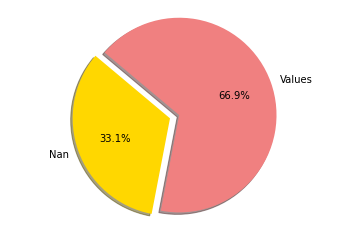

2141

In [8]:
# Plot NaN values to see the distribution

NAn= len(df_train.location[df_train["location"].isnull()==True])
Val= len(df_train.location)-NAn
#Piechart
labels = 'Nan', 'Values'
sizes = [NAn, Val]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()
NAn

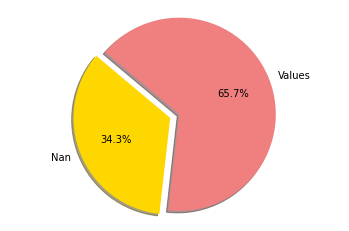

In [9]:
NAn= len(df_test.location[df_test["location"].isnull()==True])
Val= len(df_test.location)-NAn
#Piechart
labels = 'Nan', 'Values'
sizes = [NAn, Val]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


A lot of Missing values. Maybe we need to drop it.

## Some text Distribution


In [10]:
import string

# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))


# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))


### Distribution Graphics

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


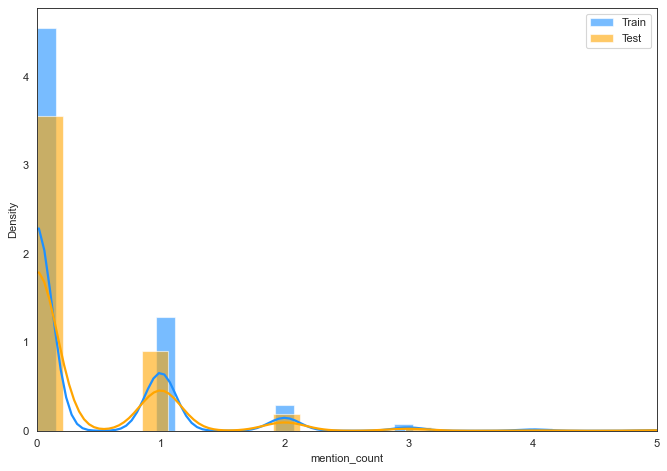

In [11]:
import seaborn as sns

# Graphic distribution in test & train data for mention count 
sns.set_style("white")
x1 = df_train["mention_count"]
x2 = df_test["mention_count"]


# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Train", **kwargs)
sns.distplot(x2, color="orange", label="Test", **kwargs)
plt.xlim(0,5)
plt.legend();

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


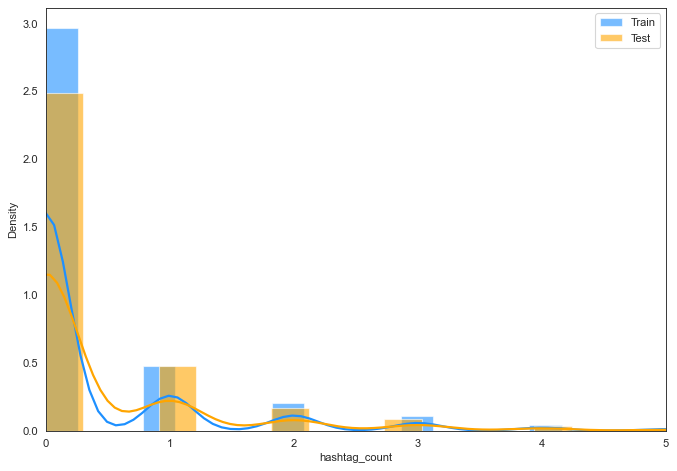

In [12]:
# Graphic distribution in test & train data for hashtag count
sns.set_style("white")
x1 = df_train["hashtag_count"]
x2 = df_test["hashtag_count"]


# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Train", **kwargs)
sns.distplot(x2, color="orange", label="Test", **kwargs)
plt.xlim(0,5)
plt.legend();

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


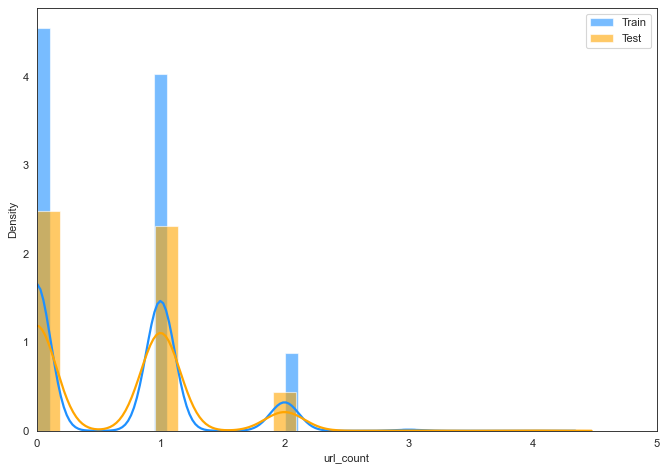

In [13]:
# Graphic distribution in test & train data for url count
sns.set_style("white")
x1 = df_train["url_count"]
x2 = df_test["url_count"]


# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Train", **kwargs)
sns.distplot(x2, color="orange", label="Test", **kwargs)
plt.xlim(0,5)
plt.legend();

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


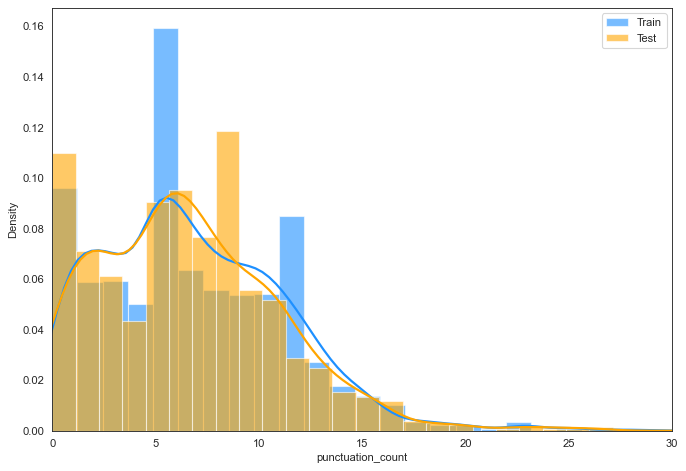

In [14]:
# Graphic distribution in test & train data for punctuation count

x1 = df_train["punctuation_count"]
x2 = df_test["punctuation_count"]


# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Train", **kwargs)
sns.distplot(x2, color="orange", label="Test", **kwargs)
plt.xlim(0,30)
plt.legend();

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


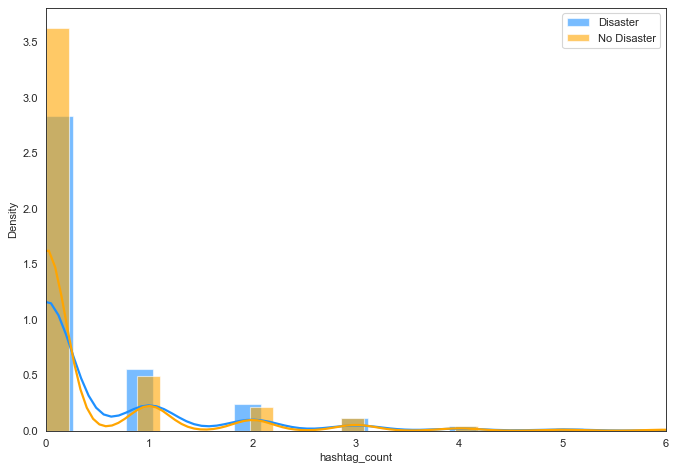

In [15]:

x1 = df_train.loc[df_train.target==1,"hashtag_count"]
x2 = df_train.loc[df_train.target==0, "hashtag_count"]


# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="dodgerblue", label="Disaster", **kwargs)
sns.distplot(x2, color="orange", label="No Disaster", **kwargs)
plt.xlim(0,6)
plt.legend();

## Ngrams

### Unigrams


<AxesSubplot:>

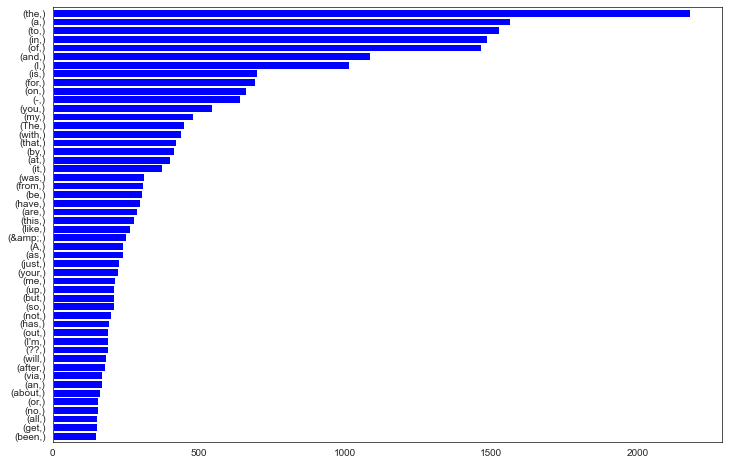

In [16]:
# Distribution of every words in the train dataset 

from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import spacy 
nlp=spacy.load("en_core_web_sm")

words=[]
for t in df_train.text:
  for word in t.split():
      words.append(word)
x=(pd.Series(nltk.ngrams(words, 1)).value_counts())[:50]

x.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

The target value can affect the unigrams ?


<AxesSubplot:>

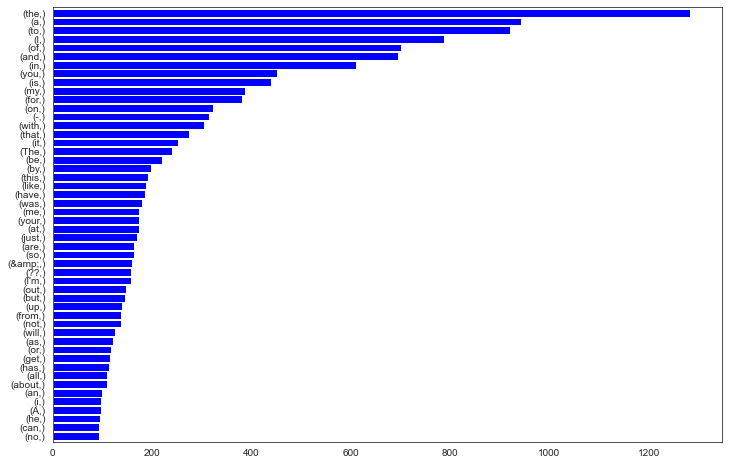

In [17]:
df_answer2=df_train[df_train["target"]==0]
words=[]
for t in df_answer2.text:
  for word in t.split():
      words.append(word)
x2=(pd.Series(nltk.ngrams(words, 1)).value_counts())[:50]
x2.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

<AxesSubplot:>

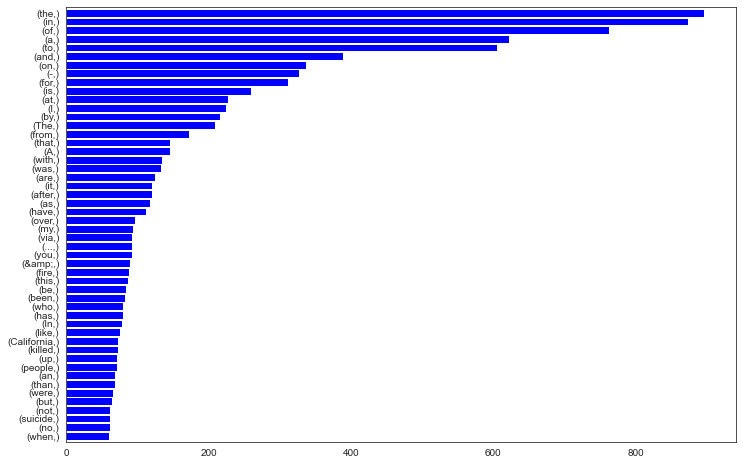

In [18]:
#Distribution des mots: 
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import spacy 

#Disaster 
nlp=spacy.load("en_core_web_sm")
df_answer=df_train[df_train["target"]==1]
words=[]
for t in df_answer.text:
  for word in t.split():
      words.append(word)
x=(pd.Series(nltk.ngrams(words, 1)).value_counts())[:50]
x.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))


### Bigram

<AxesSubplot:>

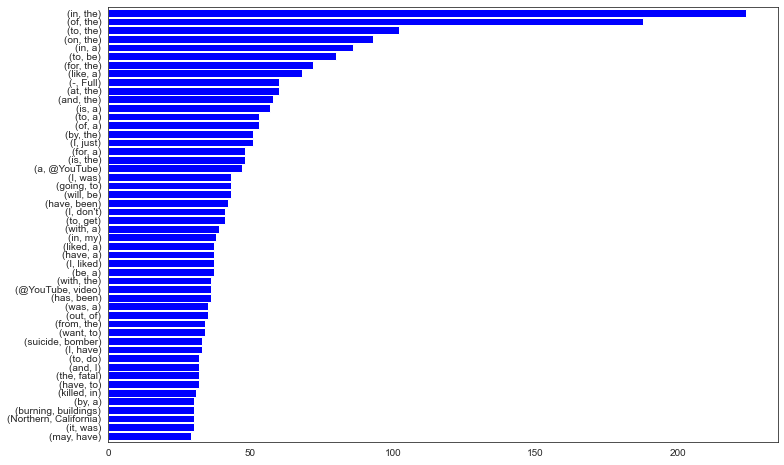

In [19]:
words=[]
for t in df_train.text:
  for word in t.split():
      words.append(word)
x=(pd.Series(nltk.ngrams(words, 2)).value_counts())[:50]

x.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

### Trigram

<AxesSubplot:>

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


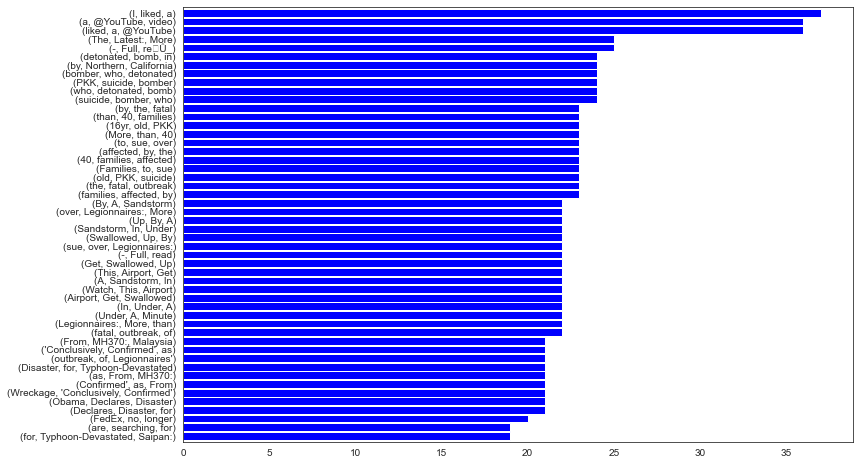

In [20]:
words=[]
for t in df_train.text:
  for word in t.split():
      words.append(word)
x=(pd.Series(nltk.ngrams(words, 3)).value_counts())[:50]

x.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

We need to clean some data as &amp or the MH370 case.
Maybe say something for the distribution of words

## Keywords

In [21]:
keyw=[]
for i in df_train.keyword:
  keyw.append(i)
counted=Counter(keyw)
x=counted.most_common(150)
#Key
key=[]
for i in range(len(x)):
  key.append(x[i][0])


key

[nan,
 'deluge',
 'earthquake',
 'harm',
 'collision',
 'ambulance',
 'fatalities',
 'hostages',
 'collided',
 'sinking',
 'siren',
 'weapons',
 'destroy',
 'fear',
 'outbreak',
 'twister',
 'crush',
 'burning%20buildings',
 'body%20bags',
 'armageddon',
 'fatal',
 'wreckage',
 'sunk',
 'sinkhole',
 'flames',
 'fire',
 'derailment',
 'hellfire',
 'weapon',
 'catastrophe',
 'ablaze',
 'flooding',
 'hijacker',
 'death',
 'blaze',
 'massacre',
 'damage',
 'thunder',
 'fatality',
 'derail',
 'devastation',
 'wreck',
 'disaster',
 'storm',
 'typhoon',
 'injury',
 'evacuation',
 'structural%20failure',
 'wrecked',
 'whirlwind',
 'inundated',
 'tragedy',
 'debris',
 'displaced',
 'aftershock',
 'rescued',
 'detonate',
 'collapsed',
 'heat%20wave',
 'nuclear%20reactor',
 'curfew',
 'upheaval',
 'screaming',
 'sandstorm',
 'evacuate',
 'bioterror',
 'windstorm',
 'wounded',
 'quarantined',
 'stretcher',
 'hurricane',
 'mudslide',
 'razed',
 'screams',
 'nuclear%20disaster',
 'army',
 'panic',
 

There is a problem with the keywords.The space isn't decoded correctly. We can see in the text some %20

In [22]:
df_train["keyword"]= df_train["keyword"].astype(str)
for i in range(len(df_train["keyword"])):
  df_train["keyword"].iloc[i]=df_train["keyword"].iloc[i].replace("%20"," ")


df_test["keyword"]= df_test["keyword"].astype(str)
for i in range(len(df_test["keyword"])):
  df_test["keyword"].iloc[i]=df_test["keyword"].iloc[i].replace("%20"," ")



/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


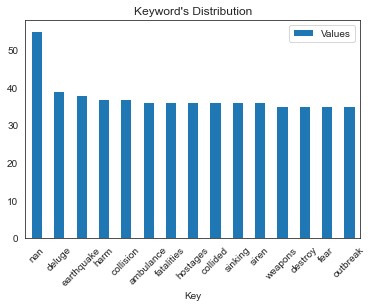

In [23]:
#Train
keyw=[]
for i in df_train.keyword:
  keyw.append(i)
counted=Counter(keyw)
x=counted.most_common(15)
#Key
key=[]
for i in range(len(x)):
  key.append(x[i][0])

#Values:
values=[]
for i in range(len(x)):
  values.append(x[i][1])
values
data = {'Key': key,
        'Values': values
       }
df = pd.DataFrame(data,columns=['Key','Values'])
df.plot(x ='Key', y='Values', kind = 'bar')
plt.title("Keyword's Distribution")
plt.xticks(rotation=45)
plt.show()

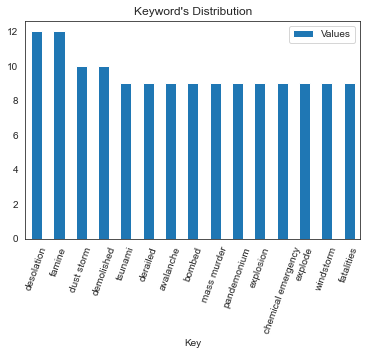

In [24]:
#Test
keyw=[]
for i in df_test.keyword:
  keyw.append(i)
counted=Counter(keyw)
x=counted.most_common(15)
#Key
key=[]
for i in range(len(x)):
  key.append(x[i][0])

#Values:
values=[]
for i in range(len(x)):
  values.append(x[i][1])
values
data = {'Key': key,
        'Values': values
       }
df = pd.DataFrame(data,columns=['Key','Values'])
df.plot(x ='Key', y='Values', kind = 'bar')
plt.title("Keyword's Distribution")
plt.xticks(rotation=70)
plt.show()

We can see Nan in the train set but don't appear on the test set. We are going to check this deeper:

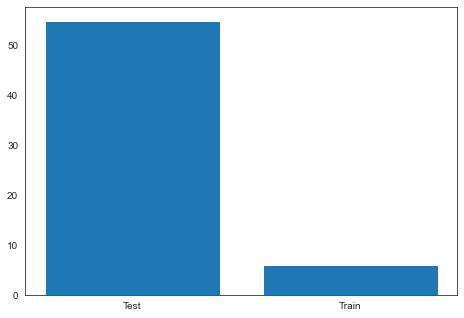

In [25]:
# Check different distribution of Nan keywords in the different datasets (Test and Train)

Missing_test= df_test.keyword[df_test["keyword"]=="nan"].count()
Missing_train=df_train.keyword[df_train["keyword"]=="nan"].count()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["Test", "Train"]
students = [Missing_train,Missing_test]
ax.bar(langs,students)
plt.show()

# Base rate

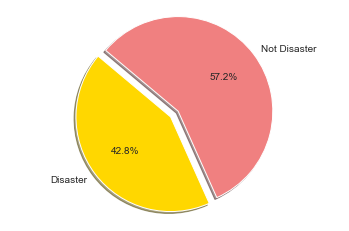

In [26]:
# Plot the distribution of Disaster / Not disaster in the training set 
Disaster= df_train.target[df_train["target"]==1].count()
NoDisaster= df_train.target[df_train["target"]==0].count()
#Piechart
labels = 'Disaster', 'Not Disaster'
sizes = [Disaster, NoDisaster]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Bonus WordCloud

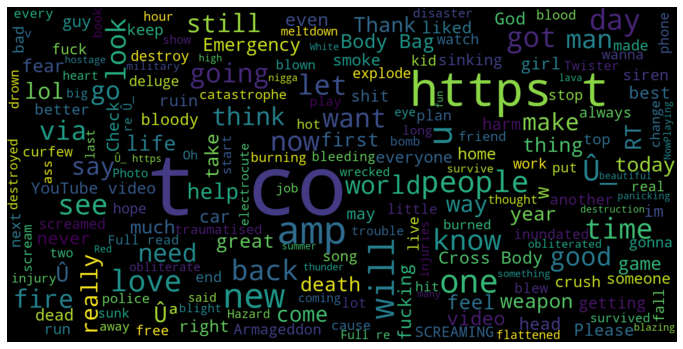

In [27]:
# WordCloud to visualise occurence of words in the training set where target = 0

no_dis_tweets = df_train[df_train.target == 0]
word = []
for t in no_dis_tweets.text:
    word.append(t)
word = pd.Series(word).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(word)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

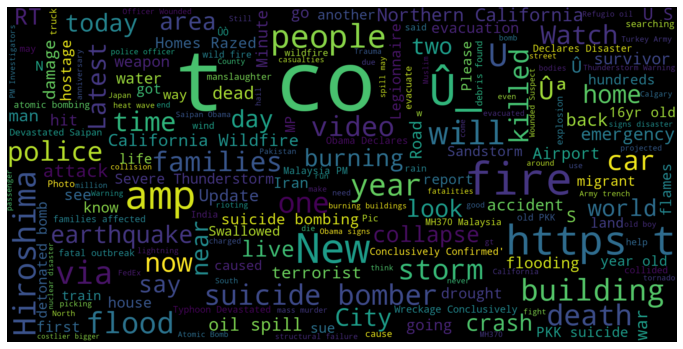

In [28]:
# WordCloud to visualise occurence of words in the training set where target = 1

no_dis_tweets = df_train[df_train.target == 1]
word = []
for t in no_dis_tweets.text:
    word.append(t)
word = pd.Series(word).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(word)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Model and improvement of the Model

In this part, we want to beat our base rate accuracy. For achieving it, we gonna test/do :
- Different models 
- Pre-Processing 
- Differents variable

For the part 1, we gonna try some supervised Model like Logistic, LogisticCV, Random and etc. Our refercial accurace score is our base rate (57%). 



### Choose a model 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import spacy
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

Model_base_rate=0.57

sp = spacy.load('en_core_web_sm')
message= str(df_train["text"])
my_word= sp(message)
stop_words = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation

def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() and word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    
    # Return preprocessed list of tokens
    return mytokens



def New_model(x):
  if x>Model_base_rate:
    print("There is a improvement of "+str(accuracy_score(y_test,y_pred)-Model_base_rate))
  else: 
    print("There's no improvement ")
    
    

#Model: 

X = df_train["text"] # the features we want to analyze
ylabels = df_train['target'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)


tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, min_df=1, max_df=1.0, analyzer="word")

# Define classifier
classifier = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

#Essai 1:

# Evaluate the model
def evaluate(true, pred):
    precision = precision_score(true, pred)
    recall = recall_score(true, pred)
    f1 = f1_score(true, pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")
#Essai 1:

train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)


# Predictions
y_pred = pipe.predict(X_test)
print("The accurancy is" + " " +str(accuracy_score(y_test,y_pred)))


New_model(accuracy_score(y_test,y_pred))

0.8950927357032458
The accurancy is 0.803088803088803
There is a improvement of 0.2330888030888031


Ok nice with a simple Logitic Regression we reach a better accuracy.

Maybe we are lucky with the model. We want to test more model before going deeper in one. 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
model_accuracy=[]

X = df_train["text"] # the features we want to analyze
ylabels = df_train['target'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)


tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")


classifier = [LogisticRegression(), LogisticRegressionCV(),RandomForestClassifier(), svm.SVC(),MultinomialNB(),BernoulliNB()]
Model_comparaison = 0
Model_train=[]




for i in classifier:
    # pipeline
    pipe = Pipeline([('vectorizer', tfidf),
                     ('classifier', i)])

    # Fit model on training set
    pipe.fit(X_train, y_train)
    train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))

    # Predictions
    y_pred = pipe.predict(X_test)
    
    print("-----------------------------------------------")
    print(" ")
    print("With the Model: " + str(i))
    print("Test Accuracy of " + str(accuracy_score(y_test,y_pred)))
    print("Train Accuracy of " +str(train_accuracy_score))
    model_accuracy.append(accuracy_score(y_test,y_pred))
    Model_train.append(train_accuracy_score)
    
    #Comparaison 
    if accuracy_score(y_test,y_pred)>Model_comparaison:
        
        
        if Model_comparaison == 0:
            print("First Test the accuracy is " + str(accuracy_score(y_test, y_pred)))
            print(" ")
            Model_comparaison= accuracy_score(y_test, y_pred)
                  
        else:
            Model_comparaison = accuracy_score(y_test, y_pred)
            print("There is a improvement of " + str(accuracy_score(y_test, y_pred)- Model_comparaison))
            print(" ")
    else :
        print("Not the best model tested 'Based on Test accuracy'")
        print(" ")
    


-----------------------------------------------
 
With the Model: LogisticRegression()
Test Accuracy of 0.8108108108108109
Train Accuracy of 0.9254250386398764
First Test the accuracy is 0.8108108108108109
 
-----------------------------------------------
 
With the Model: LogisticRegressionCV()
Test Accuracy of 0.8015444015444015
Train Accuracy of 0.9972952086553323
Not the best model tested 'Based on Test accuracy'
 
-----------------------------------------------
 
With the Model: RandomForestClassifier()
Test Accuracy of 0.783011583011583
Train Accuracy of 0.9972952086553323
Not the best model tested 'Based on Test accuracy'
 
-----------------------------------------------
 
With the Model: SVC()
Test Accuracy of 0.8
Train Accuracy of 0.9878284389489954
Not the best model tested 'Based on Test accuracy'
 
-----------------------------------------------
 
With the Model: MultinomialNB()
Test Accuracy of 0.803088803088803
Train Accuracy of 0.9743044822256569
Not the best model teste

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

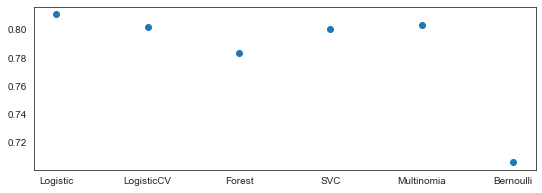

In [31]:
#Graph for the different model based on their performance: 
Classifier=["Logistic","LogisticCV","Forest","SVC","Multinomia", "Bernoulli"]
plt.figure(figsize=(9, 3))
plt.scatter(Classifier, model_accuracy)
plt.show()

In [32]:
for i in Model_train:
    print(i)

0.9254250386398764
0.9972952086553323
0.9972952086553323
0.9878284389489954
0.9743044822256569
0.9294822256568779


Our best model is the LogisticRegression. 

### Pre-Processing 

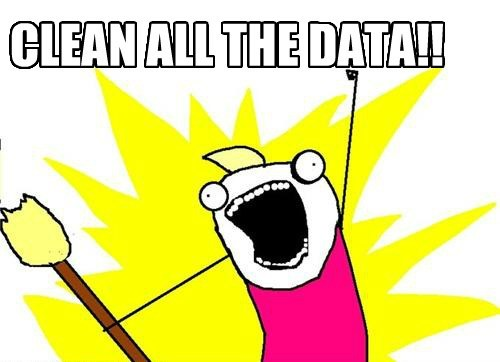

We try to clean our model. We want to standardize the texte. We are going to remove : 
- Http 
- Unicode 
- Expression 
- Abrevation and some hashtags 




#### Unicode removed

In [33]:
import re 

def clean_text(x):
  x = x.encode('ascii', 'ignore').decode()
  return x

df_train["clean_text"]=df_train["text"].apply(lambda x : clean_text(x))

#### HTTP removed

In [34]:
def clean_text(x):
  x = re.sub("https*\S+", "", x)
  return x

df_train["clean_text"]=df_train["text"].apply(lambda x : clean_text(x))

#### Final Clean function for the text

In [35]:

def clean_text(x):


  #Site and decode problem:
  x = re.sub("https*\S+", " ", x)
  x = re.sub(r"amp", "and", x)
  x = re.sub(r"Ûª", "'", x)
  x = re.sub(r"Û_", "'", x)
  x = re.sub(r"Û", "'", x)
  x = re.sub(r"&lt", "", x)
  x = re.sub(r"&gt; ", "", x)

  x= re.sub(r"aaaaaaallll", "all", x)
  x= re.sub(r"looooooooooool","lol",x)
  x= re.sub(r"womengirls ","womengirls ",x)
  x = re.sub(r"2p,", "02:00 pm", x)


  x = re.sub(r"frat's", "fraternity of", x)
  x = re.sub(r"who's", "who is", x)
  x = re.sub(r"awwww", "", x)
  x = re.sub(r"2-1-21", "02-01-2021", x)
  x = re.sub(r"4:30 P.M. ", "4:30 pm ", x)
  x = re.sub(r"11-Year-Old", "11 year old", x)
  x = re.sub(r"country's ", "country of", x)
  x = re.sub(r"pls", "please", x)
  x = re.sub(r"wrapup ", "wrap up", x)
  x = re.sub(r"9:31PM", "9:31 PM ", x)
  x = re.sub(r"10:15PM  ", "10:15", x)
  x = re.sub(r" 16yr", " 16 year ", x)
  x = re.sub(r" individl", " individual", x)
  x = re.sub(r" 14-year-old", "14 year old", x)
  x = re.sub(r"ii", "2", x)
  x = re.sub(r" no.", " number", x)
  x = re.sub(r" mr.obama", " mister obama", x)
  x= re.sub(r" u ", " you ", x)
  x= re.sub(r" fundwhen", " fund when " , x)
  x= re.sub(r" 2slow2report", " too slow to report " , x)
  x= re.sub(r" ÛÏNewsÛ ", " news " , x)
 

  #Expression:
  x = re.sub(r" lmao", " laughing my ass off", x)
  x = re.sub(r" lmfaoooo", " laughing my ass off", x)
  x = re.sub(r" wth ", " what the hell ", x)
  x = re.sub(r" 4sake ", " forsake ", x)
  x = re.sub(r"omg ", " oh my god ", x)
  x = re.sub(r" smh", " so much hate", x)
  x = re.sub(r" RT", "", x)


  # Hashtags and usernames 
  x= re.sub(r" foxnews", " fox news" , x)

  #verbs
  
  # specific
  x = re.sub(r"won't", "will not", x)
  x = re.sub(r"can\'t", "can not", x)

    # general
  x = re.sub(r"n\'t", " not", x)
  x = re.sub(r"\'re", " are", x)
  x = re.sub(r"\'s", " is", x)
  x = re.sub(r"\'d", " would", x)
  x = re.sub(r"\'ll", " will", x)
  x = re.sub(r"\'t", " not", x)
  x = re.sub(r"\'ve", " have", x)
  x = re.sub(r"\'m", " am", x)
    
  
  
  x = re.sub(r"semasirtalks","semasir talks",x)
  x = re.sub(r" st "," street",x)
  x = re.sub(r"wo nt","will not",x)
  x = re.sub(r"2 pm","2:00 pm",x)
  x = re.sub(r"westerncanadadrought","western canada drought",x)
  x = re.sub(r" dr ","doctor",x)
  x = re.sub(r"wtf","what the fuck",x)
  x = re.sub(r"lil","little",x)
  x = re.sub(r"ww3","world war three",x)
  x = re.sub(r"nc senate","north carolina senate",x)
  x = re.sub(r"8/19","08-2019",x)
  x = re.sub(r"lol","lot of laugh",x)
  x = re.sub(r"govt","government",x)
  x = re.sub(r"gop","grand old party",x)
  x = re.sub(r"didnt","did not",x)
  x = re.sub(r"rio2016","rio 2016",x)
  x = re.sub(r"icymi","in case you missed it",x)
  x = re.sub(r"jsdf","japan self defense forces",x)
  x = re.sub(r"3-inspired","3 inspired",x)

  x = re.sub(r"goooooooaaaaaal","goal",x)
  x = re.sub(r"numberplaying","number playing",x)
  x = re.sub(r" ve ","have",x)
  x = re.sub(r"wanna ","want to",x)
  x = re.sub(r"uswarcrimes","united state war crimes",x)
  x = re.sub(r"@breachgamingorg","breach gaming organization",x)
  x = re.sub(r".@david_cameron","david cameron",x)
  x = re.sub(r"mi-17","helicopter mi-17",x)
  x = re.sub(r"scwx", "south carolina weather",x)
  x = re.sub(r"twcnews","twc news",x)
  x = re.sub(r"@officialmqm"," official muttahida quami movement",x)
  x = re.sub(r"@itsjustinstuart","it is justin stuart",x)
  x = re.sub(r"twcnews","twc news",x)

  #acronyms/abreviation:
  x = re.sub(r" offr "," officier ",x)
  x = re.sub(r" tlvfaces", " israel diaspora coalition", x)
  x = re.sub(" n.h."," new hampshire",x)
  x = re.sub(r" mh ", " mental health", x)
  x = re.sub(r"nws ", "national weather service", x)
  x = re.sub(r"#lgbt ", "lesbian gay bisexual and transgender", x)
  x = re.sub(r"cdt ", "central daylight time", x)
  x = re.sub(r"2-u.s.", "to united states", x)
  x = re.sub(r" usfs ", " united states fire service ", x)
  x = re.sub(r"mh370", "malaysia airlines 370", x)
  x = re.sub(r"mh17", "malaysia airlines 17", x)
  x = re.sub(r" lrt", " light rail transit", x)
  x = re.sub(r" its", " it is", x)
  x = re.sub(r" wsls", " wsls television news", x)
  x = re.sub(r" fgcu", " florida gulf coast university", x)
  x = re.sub(r" i.s.i.s.", " isis", x)
  x = re.sub(r" tv", " television", x)
  x = re.sub(r" jr.", " junior", x)
  x = re.sub(r" u.s.", " united state", x)
  x = re.sub(r" usa", " united state", x)
  x = re.sub(r" @", "", x)

  return x

df_train["clean_text"]=df_train["text"].apply(lambda x : clean_text(x))



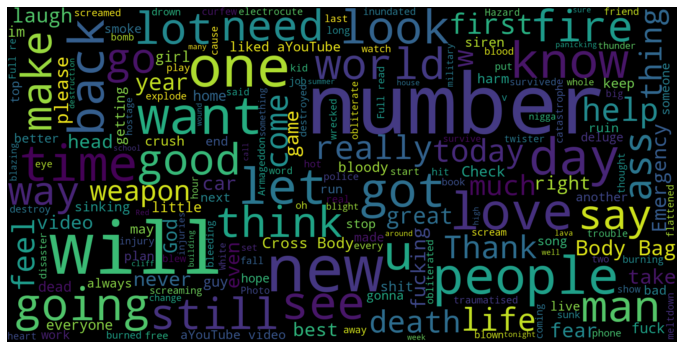

In [36]:
# WordCloud to visualise occurence of words in the training set where target = 0

no_dis_tweets = df_train[df_train.target == 0]
word = []
for t in no_dis_tweets.clean_text:
    word.append(t)
word = pd.Series(word).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(word)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Try to see if there is any impovement.

In [37]:
Model_base_rate=0.8115830115830116

X = df_train["clean_text"] # the features we want to analyze
ylabels = df_train['target'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)


tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,2),
                                   min_df=1, max_df=1.0, analyzer="word")

# Define classifier
classifier = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)

# Predictions
y_pred = pipe.predict(X_test)
print("The accurancy is" + " " +str(accuracy_score(y_test,y_pred)))



New_model(accuracy_score(y_test,y_pred))

0.9095826893353941
The accurancy is 0.8061776061776061
There's no improvement 


### Other pre-processing things: 

We saw on the internet a retarget technique. We are going to try on our notebook and see What happen

In [38]:
prob = df_train.groupby(['text']).nunique().sort_values(by='target', ascending=False)
prob = prob[prob['target'] > 1]['target']
prob.index.tolist()

['RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG',
 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!',
 "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'",
 'Caution: breathing may be hazardous to your health.',
 "Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...",
 'He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam',
 '.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4',
 '#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect',
 'that horrible sinking feeling when you\x89Ûªve been at home on your phone for a while and you realise its been on 3G t

In [39]:
df_train['target_relabeled'] = df_train['target']

df_train.loc[df_train['text'] == 'like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit', 'target_relabeled'] = 0
df_train.loc[df_train['text'] == 'Hellfire is surrounded by desires so be careful and donÛªt let your desires control you! #Afterlife', 'target_relabeled'] = 0
df_train.loc[df_train['text'] == 'To fight bioterrorism sir.', 'target_relabeled'] = 0
df_train.loc[df_train['text'] == '.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4', 'target_relabeled'] = 1
df_train.loc[df_train['text'] == 'In #islam saving a person is equal in reward to saving all humans! Islam is the opposite of terrorism!', 'target_relabeled'] = 0
df_train.loc[df_train['text'] == 'RT NotExplained: The only known image of infamous hijacker D.B. Cooper. http://t.co/JlzK2HdeTG', 'target_relabeled'] = 1
df_train.loc[df_train['text'] == "Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...", 'target_relabeled'] = 0
df_train.loc[df_train['text'] == "He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam", 'target_relabeled'] = 0
df_train.loc[df_train['text'] == "Hellfire! We don\x89Ûªt even want to think about it or mention it so let\x89Ûªs not do anything that leads to it #islam!", 'target_relabeled'] = 0
df_train.loc[df_train['text'] == "The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'", 'target_relabeled'] = 0
df_train.loc[df_train['text'] == "Caution: breathing may be hazardous to your health.", 'target_relabeled'] = 1
df_train.loc[df_train['text'] == "I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????", 'target_relabeled'] = 0
df_train.loc[df_train['text'] == "#Allah describes piling up #wealth thinking it would last #forever as the description of the people of #Hellfire in Surah Humaza. #Reflect", 'target_relabeled'] = 0
df_train.loc[df_train['text'] == "that horrible sinking feeling when youÛªve been at home on your phone for a while and you realise its been on 3G this whole time", 'target_relabeled'] = 0


#### Retry of our models 

Do we have some labels problem ? Yes
-> improvement !!! Oh yeah 

What happened with this modification ? 
With the target relabeled we improve our models of : 

In [40]:
Variable_comparaison=[]
X = df_train["text"] # the features we want to analyze
ylabels = df_train['target_relabeled'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)


tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")

# Define classifier
classifier = LogisticRegression(C=1.623776739188721, solver="lbfgs", max_iter=5000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)



train_accuracy_score = round(accuracy_score(y_train, pipe.predict(X_train)),3)
print(train_accuracy_score)
# Predictions
y_pred = pipe.predict(X_test)
print("The accuracy score is :" + " " +str(round(accuracy_score(y_test,y_pred),3)))
Variable_comparaison.append(accuracy_score(y_test,y_pred))




0.966
The accuracy score is : 0.814


In [41]:
df_train["location"]=df_train["location"].apply(str)


X = df_train["location"] # the features we want to analyze
ylabels = df_train['target_relabeled'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)


tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")

# Define classifier
classifier = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)



train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)
# Predictions
y_pred = pipe.predict(X_test)
print("Pour l'essaie un l'accuracy est de" + " " +str(accuracy_score(y_test,y_pred)))
Variable_comparaison.append(accuracy_score(y_test,y_pred))

0.7287480680061824
Pour l'essaie un l'accuracy est de 0.5938223938223938


In [42]:
df_train["keyword"]=df_train["keyword"].apply(str)

X = df_train["keyword"] # the features we want to analyze
ylabels = df_train['target_relabeled'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)


tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")

# Define classifier
classifier = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)



train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)
# Predictions
y_pred = pipe.predict(X_test)
print("Accuracy Score:" + " " +str(accuracy_score(y_test,y_pred)))
Variable_comparaison.append(accuracy_score(y_test,y_pred))




0.7459428129829985
Accuracy Score: 0.7328185328185328


### Other variables in our model ? 

In this rubric, we want to test other variables as location and Keyword. We have already cleaned the Keyword's problem (%20 for the space character). 

But we need to clean also the location variable. For attemping this, we gonna use the library pycountry and geocoder. We want to keep only the country. 
We saw in the data's exploration there is a lot of way to write the location ( United States of America can be written as US , Florida, United State, .....). 

We need to generalize that. 

#### With Location : 

In [ ]:
#States USA: 

#Transformation en adresse:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="svvv")


df_train["location"].fillna(0)



for i in range(len(df_train)):
    if type(df_train.location.iloc[i]) == float:
        df_train.location.iloc[i] = "UnKnown"
    else:
        try:
            location = geolocator.geocode(df_train.location.iloc[i],language="en")
            df_train.location.iloc[i]=location.address
            
        except:
            df_train.location.iloc[i] = "UnKnown"




/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
for i in range(len(df_train.location)):
    
    if df_train["location"].iloc[i]== "UnKnown":
        df_train["location"].iloc[i]=df_train["location"].iloc[i]
    else:
        x= df_train["location"].iloc[i].split(",")
        df_train["location"].iloc[i]=x[-1]


In [ ]:
#Create our new variable: 
df_train["text_location"] = df_train.text
for i in range(len(df_train.text_location)):
    df_train.text_location.iloc[i]=df_train.text.iloc[i] + " " + df_train.location.iloc[i]
    
for i in df_train.text_location:
    print (i)
df_train.text_location = df_train.text_location.apply(str)

In [ ]:

X = df_train["text_location"] # the features we want to analyze
ylabels = df_train['target_relabeled'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)


tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")

# Define classifier
classifier = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)



train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)
# Predictions
y_pred = pipe.predict(X_test)
print("Pour l'essaie un l'accuracy est de" + " " +str(accuracy_score(y_test,y_pred)))
Variable_comparaison.append(accuracy_score(y_test,y_pred))






Our best Model is the LogisticRegression with the ngrams (1,3).Now we have a accurancy of 0.8138996138996138

We go deeper on this model may be trying to go with a doc2vec for improvement. 

The submission for this accurancy is : 

#### With Keywords:

In [ ]:
df_train["text_key"] = df_train.text
for i in range(len(df_train.text_key)):
    df_train.text_key.iloc[i]=df_train.text.iloc[i] + " " + df_train.keyword.iloc[i]


    
df_train.text_key = df_train.text_key.apply(str)

In [ ]:
X = df_train["text_key"] # the features we want to analyze
ylabels = df_train['target_relabeled'] 

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)


tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")

# Define classifier
classifier = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)



train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)
# Predictions
y_pred = pipe.predict(X_test)
print("Pour l'essaie un l'accuracy est de" + " " +str(accuracy_score(y_test,y_pred)))
Variable_comparaison.append(accuracy_score(y_test,y_pred))


##### With Keyword and Location

In [ ]:
df_train["text_location_key"] = df_train.text

for i in range(len(df_train.text_location_key)):
    df_train.text_location_key.iloc[i]=df_train.text.iloc[i] + " " + df_train.keyword.iloc[i] + " " + df_train.location.iloc[i]

df_train.text_location_key = df_train.text_location_key.apply(str)

In [ ]:
X = df_train["text_location_key"] # the features we want to analyze


# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)


tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")

# Define classifier
classifier = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)



train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)




# Predictions
y_pred = pipe.predict(X_test)
print("Pour l'essaie un l'accuracy est de" + " " +str(accuracy_score(y_test,y_pred)))




Variable_comparaison.append(accuracy_score(y_test,y_pred))



In [ ]:
for i in Variable_comparaison:
    print(i)

In [ ]:
Name_var=["Text","Location", "Keyword", "Text With location","Text With Keywords","Text With Key + Loc"]
plt.figure(figsize=(10, 5))
plt.bar(Name_var, Variable_comparaison)
label = ['0.813', '0.583', '0.733', '0.785', '0.806', '0,806']
for i in range(len(Variable_comparaison)):
    plt.text(x = Name_var[i] , y = Variable_comparaison[i], s=label[i], size = 10)
plt.xticks( rotation=45)


plt.show()

When we used only the text, we have a better accuracy score. 

### Optimization: 

Now we have our classifier and the varibales we want to keep. 

It's time to optimize our selection. 

- Hyper-parameter tuning
- Vector configuration 
- PCA 

#### Hyper Parameter tuning : 

In [ ]:
from sklearn.model_selection import GridSearchCV


X = df_train["text"] # the features we want to analyze
ylabels = df_train['target_relabeled'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)




tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")
# Define classifier
classifier = LogisticRegression()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

param_grid = [
    {'classifier' : [LogisticRegression()],
    'classifier__penalty' : ["l1", "l2", "elasticnet"],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ["newton-cg", "lbfgs"]}]




clf = GridSearchCV(pipe,param_grid = param_grid, cv = 6, verbose=True, n_jobs=-1, scoring='accuracy')

best_model=clf.fit(X_train, y_train)

print(clf.cv_results_)
print('Best C:', clf.best_estimator_.get_params()['classifier__C'])
print(); print(clf.best_estimator_.get_params()['classifier'])

In [ ]:
print(best_model.best_params_, best_model.best_score_)

#### Vector configuration 

In [ ]:
# Create list of configs
def configs():

    models = list()
    
    # Define config lists
    ngram_range = [(1, 3)]
    min_df = [1,2,3,4,5]
    max_df = [1.0,2.0,3.0,4.0,5.0]
    analyzer=['word', 'char']
    
    # Create config instances
    for n in ngram_range:
        for i in min_df:
            for j in max_df:
              for a in analyzer:
                    cfg = [n, i, j, a]
                    models.append(cfg)
    return models

configs = configs()
# Define list for result
result = []

for config in configs:

    # Redefine vectorizer
    tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=config[0],
                                   min_df=config[1], max_df=config[2], analyzer=config[3])

    # Define classifier
    classifier = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=72)

    # Create pipeline
    pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

    # Fit model on training set
    pipe.fit(X_train, y_train)

    # Predictions
    y_pred = pipe.predict(X_test)

    # Print accuracy on test set
    print("CONFIG: ", config)
    evaluate(y_test, y_pred)
    print("-----------------------")

    # Append to result
    result.append([config, accuracy_score(y_test, y_pred)])

#### Pca 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df_train["text"] # the features we want to analyze
ylabels = df_train['target'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)




tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")



X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()


# Define classifier
classifier = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=72)



# define Model
# define Model
pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('pca', PCA(n_components=1)),
                 ('logistic reg', classifier)
                 ])
# Fit model on training set
pipe.fit(X_train, y_train)



train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)
# Predictions
y_pred = pipe.predict(X_test)
print("Accuracy Score" + " " +str(accuracy_score(y_test,y_pred)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df_train["text_key"] # the features we want to analyze
ylabels = df_train['target_relabeled'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)




tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")



X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()
# Define classifier



# define Model
# define Model
pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('pca', PCA(n_components=0.81)),
                 ('logistic reg', LogisticRegressionCV(max_iter=5000, cv=5, n_jobs=-1))
                 ])
# Fit model on training set
pipe.fit(X_train, y_train)



train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)
# Predictions
y_pred = pipe.predict(X_test)
print("Accuracy Score" + " " +str(accuracy_score(y_test,y_pred)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


X = df_train["text_keyword"] # the features we want to analyze
ylabels = df_train['target_relabeled'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)




tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")



X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()
# Define classifier



# define Model
# define Model
pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('pca', PCA(n_components=0.99)),
                 ('logistic reg', LogisticRegressionCV(max_iter=5000, cv=5, n_jobs=-1)),
                 ])
# Fit model on training set
pipe.fit(X_train, y_train)



train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)
# Predictions
y_pred = pipe.predict(X_test)
print("Accuracy Score" + " " +str(accuracy_score(y_test,y_pred)))

# Unsupervised Part

## Dic 2 vec

Classification using Doc2Vec and Logistic Regression

In [ ]:
from gensim.models.doc2vec import TaggedDocument
sample_tagged = df_train.apply(lambda r: TaggedDocument(words=spacy_tokenizer(r.text), tags=[r.target_relabeled]), axis=1)
print(sample_tagged.head(20))

In [ ]:
train_tagged, test_tagged = train_test_split(sample_tagged, test_size=0.2, random_state=72)

train_tagged

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [ ]:
# Define Doc2Vec and build vocabulary
from gensim.models import Doc2Vec

model_dbow = Doc2Vec(dm=0, vector_size=30, negative=6, hs=0, min_count=1, sample=0, workers=cores, epoch=1000)
model_dbow.build_vocab([x for x in train_tagged.values])

# Train distributed Bag of Word model
model_dbow.train(train_tagged, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)

In [ ]:
# Select X and y
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=100)) for doc in sents])
    return targets, regressors

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [ ]:
# Fit model on training set - same algorithm as before
logreg = LogisticRegression(C= 1,63 max_iter=5000, solver='lbfgs', random_state=72)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate model


print(accuracy_score(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#best 0.810 with clean text

In [ ]:
#Pca from the lecture :
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time
from sklearn.feature_extraction.text import TfidfVectorizer
# Import and download packages
import re
import nltk

from nltk.corpus import stopwords
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)

# Define cleaning function


# Define Scaler
scaler = StandardScaler()

# Define PCA
pca = PCA(n_components=1)

# Example on X_train_vec


# Define vectorizer - use above cleaning function
tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, ngram_range=(1,1), min_df=3, max_df=0.9)

# Fit and transform X_train and X_test

X_train_vec = tfidf.fit_transform(X_train).toarray()
X_test_vec = tfidf.transform(X_test).toarray()


# Define Model
pipe = Pipeline([
                 ('classifier', classifier)])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))


In [ ]:
# With Standardization
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import time

# Define Model
pipe = Pipeline([('scaler', scaler),
                 ('logistic reg', LogisticRegression())
                 ])
# Fit model
start = time.time()
pipe.fit(X_train_vec, y_train)
end = time.time()
print('Time: ', round(end-start, 4))
print('Train Accuracy: ', round(pipe.score(X_train_vec, y_train), 4))
print('Test Accuracy: ', round(pipe.score(X_test_vec, y_test), 4))

# Submission

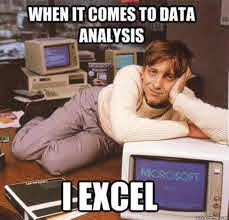

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import spacy
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 

Model_base_rate=0.8084942084942085

sp = spacy.load('en_core_web_sm')
message= str(df_train["text"])
my_word= sp(message)
stop_words = spacy.lang.en.stop_words.STOP_WORDS
punctuations = string.punctuation


def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() and word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    mytokens = [ word for word in mytokens if len(word)>2 ]





    # Return preprocessed list of tokens
    return mytokens



X = df_train["text"] # the features we want to analyze
ylabels = df_train['target_relabeled'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=72)


tfidf = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1,3),
                                   min_df=1, max_df=1.0, analyzer="word")

# Define classifier
classifier = LogisticRegression(solver="lbfgs", max_iter=5000, random_state=72)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

#Essai 1:

# Evaluate the model
def evaluate(true, pred):
    precision = precision_score(true, pred)
    recall = recall_score(true, pred)
    f1 = f1_score(true, pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")
#Essai 1:

train_accuracy_score = accuracy_score(y_train, pipe.predict(X_train))
print(train_accuracy_score)
# Predictions
y_pred = pipe.predict(X_test)
print("Pour l'essaie un l'accurancy est de" + " " +str(accuracy_score(y_test,y_pred)))
def New_model(x):
  if x>Model_base_rate:
    print("There is a improvement of "+str(accuracy_score(y_test,y_pred)-Model_base_rate))
  else: 
    print("There's no improvement ")
New_model(accuracy_score(y_test,y_pred))

In [ ]:
X_test=df_test["text"]
sentiment_pred = pipe.predict(X_test)

print("The training accuracy is", train_accuracy_score)

soumission = pd.DataFrame(sentiment_pred, columns=["target"])

soumission.to_csv('soumission30.csv')
!cp soumission30.csv "drive/My Drive/"

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install spacy
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install re
!{sys.executable} -m pip install gensim
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install pycountry
!{sys.executable} -m pip install geopy
!{sys.executable} -m pip install ipympl

